# Données de l’OFSP sur le covid

L’OFSP actualise quotidiennement plusieurs tableaux de données sur le covid, listés [dans cette page](https://www.bag.admin.ch/bag/fr/home/krankheiten/ausbrueche-epidemien-pandemien/aktuelle-ausbrueche-epidemien/novel-cov/situation-schweiz-und-international.html). On va se plonger dans le premier.

In [24]:
import pandas as pd

# matplotlib permet de générer des graphiques
import matplotlib.pyplot as plt

# on affiche les graphiques dans le notebook directement
%matplotlib inline

In [25]:
# on charge le fichier CSV directement sur le site de l’OFSP
df = pd.read_excel('https://www.bag.admin.ch/dam/bag/fr/dokumente/mt/k-und-i/aktuelle-ausbrueche-pandemien/2019-nCoV/covid-19-datengrundlage-lagebericht.xlsx.download.xlsx/200325_base%20de%20donn%C3%A9es_graphiques_COVID-19-rapport.xlsx', skiprows=6)

## Sélectionner les lignes de tant à tant

En Python, on peut découper une liste pour extraire les éléments de tel à tel index.

Exemple:

In [26]:
maliste = ['un', 'deux', 'trois', 'quatre', 'cinq', 'six']

In [27]:
# Du 2e au 4e élément – mais comme toujours, la numérotation commence à zéro
maliste[1:4]

['deux', 'trois', 'quatre']

In [28]:
# Elements à partir du 3ème
maliste[2:]

['trois', 'quatre', 'cinq', 'six']

In [29]:
# Trois derniers éléments
maliste[-3:]

['quatre', 'cinq', 'six']

### Dans Pandas
On peut faire pareil pour les lignes de notre tableau

In [30]:
# Index 5 et 6 contre intuitif 
df[5:7]

,Date,Nombre de cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nombre de décés,"Nombre de décés, cumulé"
5,2020-02-29,13,45,14,42,NaN,NaN
6,2020-03-01,11,56,10,52,NaN,NaN


In [31]:
df

,Date,Nombre de cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nombre de décés,"Nombre de décés, cumulé"
0,2020-02-24,1,1,5,5,NaN,NaN
1,2020-02-25,1,2,4,9,NaN,NaN
2,2020-02-26,10,12,9,18,NaN,NaN
3,2020-02-27,10,22,5,23,NaN,NaN
4,2020-02-28,10,32,5,28,NaN,NaN
...,...,...,...,...,...,...,...
469,2021-06-07,583,699051,15,28859,2.0,10299.0
470,2021-06-08,415,699466,6,28865,1.0,10300.0
471,2021-06-09,372,699838,8,28873,3.0,10303.0
472,2021-06-10,210,700048,2,28875,1.0,10304.0


In [32]:
# Les deux dernières lignes
df[-2:]

,Date,Nombre de cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nombre de décés,"Nombre de décés, cumulé"
472,2021-06-10,210,700048,2,28875,1.0,10304.0
473,2021-06-11,3,700051,0,28875,0.0,10304.0


In [33]:
# Les deux dernières lignes
df[-10:]

,Date,Nombre de cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nombre de décés,"Nombre de décés, cumulé"
464,2021-06-02,550,697008,11,28786,3.0,10279.0
465,2021-06-03,473,697481,16,28802,6.0,10285.0
466,2021-06-04,486,697967,17,28819,5.0,10290.0
467,2021-06-05,314,698281,11,28830,2.0,10292.0
468,2021-06-06,187,698468,14,28844,5.0,10297.0
469,2021-06-07,583,699051,15,28859,2.0,10299.0
470,2021-06-08,415,699466,6,28865,1.0,10300.0
471,2021-06-09,372,699838,8,28873,3.0,10303.0
472,2021-06-10,210,700048,2,28875,1.0,10304.0
473,2021-06-11,3,700051,0,28875,0.0,10304.0


## Une date comme index
On indique à Python de construire l’index à partir de la colonne **date**:

In [34]:
# D’abord, on convertit la date
df['Date'] = pd.to_datetime( df['Date'] )

In [35]:
# Ensuite, on en fait notre index. N’oubliez pas inplace=True!
df.set_index( df['Date'], inplace=True )

In [36]:
# Et voilà à quoi ça ressemble!
df.head()

,Date,Nombre de cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nombre de décés,"Nombre de décés, cumulé"
Date,,,,,,,
2020-02-24,2020-02-24,1,1,5,5,NaN,NaN
2020-02-25,2020-02-25,1,2,4,9,NaN,NaN
2020-02-26,2020-02-26,10,12,9,18,NaN,NaN
2020-02-27,2020-02-27,10,22,5,23,NaN,NaN
2020-02-28,2020-02-28,10,32,5,28,NaN,NaN


## Sélectionner par date
C’est le même principe que plus haut!

In [37]:
# On peut cibler des données de telle à telle date, puis faire la somme
df['2020-02-28':'2020-03-16']['Nombre de cas'].sum()

3753

In [38]:
# Ou prendre les données dès / jusqu’à telle date
df['2020-03-16':]['Nombre de cas'].sum()

697341

In [39]:
# Ou encore prendre un mois entier, avec .loc
# J’ai pris 5 lignes au hasard pour ne pas prendre tout votre écran
df.loc['2020-03'].sample(5)

,Date,Nombre de cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nombre de décés,"Nombre de décés, cumulé"
Date,,,,,,,
2020-03-20,2020-03-20,1147,8061,143,1096,21.0,90.0
2020-03-13,2020-03-13,433,1961,56,392,3.0,15.0
2020-03-28,2020-03-28,723,16231,123,2391,57.0,335.0
2020-03-02,2020-03-02,31,87,14,66,NaN,NaN
2020-03-24,2020-03-24,1243,12009,181,1693,19.0,169.0


In [40]:
df[:'2020-09-02'].tail()

,Date,Nombre de cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nombre de décés,"Nombre de décés, cumulé"
Date,,,,,,,
2020-08-29,2020-08-29,216,42213,2,4511,0.0,1769.0
2020-08-30,2020-08-30,144,42357,7,4518,1.0,1770.0
2020-08-31,2020-08-31,347,42704,9,4527,1.0,1771.0
2020-09-01,2020-09-01,364,43068,11,4538,1.0,1772.0
2020-09-02,2020-09-02,417,43485,11,4549,3.0,1775.0


# Passons aux graphiques!

Matplotlib est un module Python très puissant pour les graphiques.

Mais il est aussi très «bas niveau». Vous pouvez tout faire, mais vous devez un peu tout lui dire.

Google et StackOverflow sont vos amis...

In [41]:
plt.style.use('fivethirtyeight')

<AxesSubplot:xlabel='Date'>

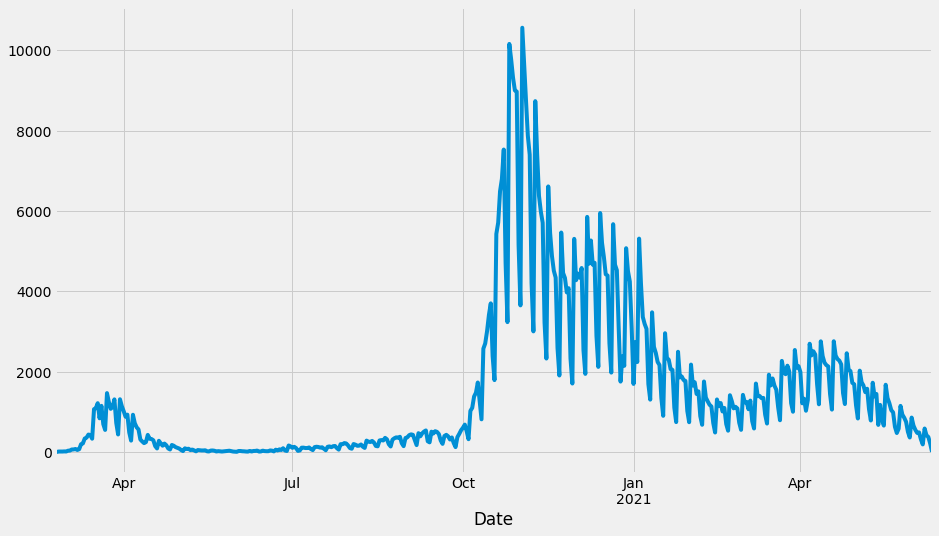

In [42]:
# Le nombre de cas quotidien
df['Nombre de cas'].plot(figsize=(14, 8))

<AxesSubplot:>

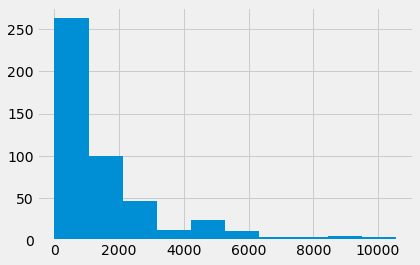

In [43]:
# Un histogramme, pour voir comment les données sont distribuées
df['Nombre de cas'].hist(bins=10)

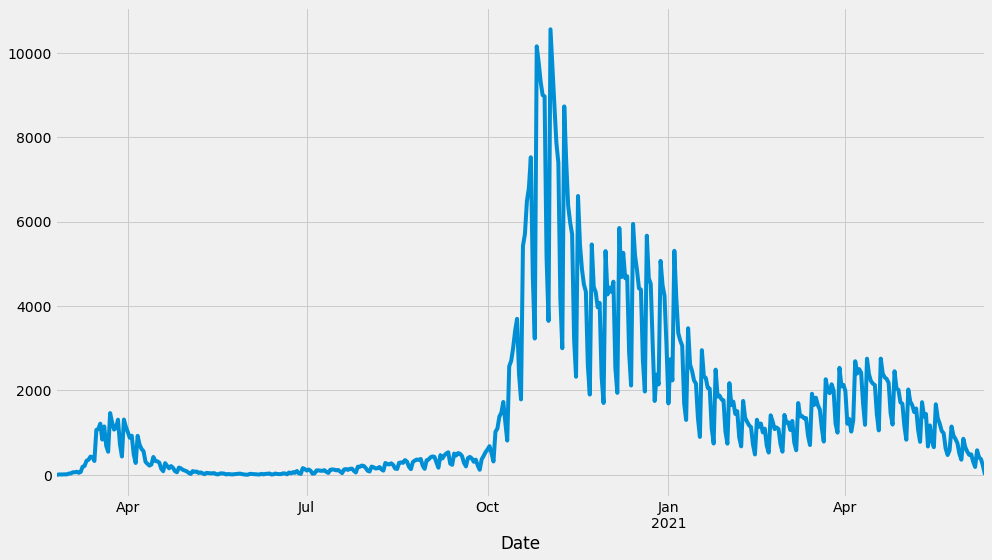

In [44]:
# Et si on veut exporter notre graphique en PDF, pour le retravailler?
df['Nombre de cas'].plot(kind='line', figsize=(14, 8))
plt.tight_layout()
plt.savefig('export_graphique.pdf')

## Moyenne mobile = rolling average
Les données du covid sont très fortement influencées par les jours de la semaine, avec des creux chaque week-end.

Elles prennent plus de sens soit quand on les regroupe par semaine, soit avec une moyenne mobile sur 7 jours:

<AxesSubplot:xlabel='Date'>

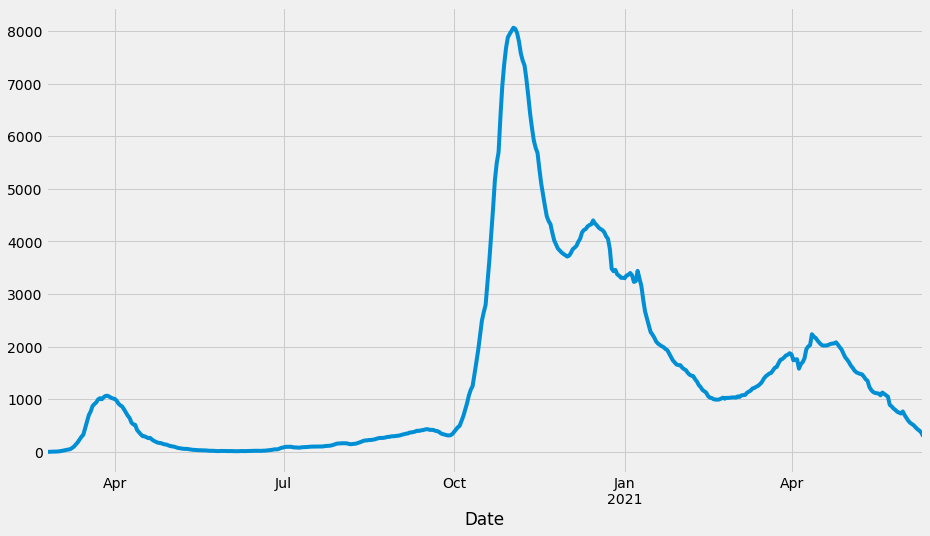

In [45]:
df['Nombre de cas'].rolling('7d').mean().plot(figsize=(14, 8))

In [47]:
# Calculer la somme hebdomadaire.
# Comme nos semaines commencent le lundi, on glisse un "loffset" (left offset) d’un jour.
df['Nombre de cas'].resample('W', label='left', loffset=pd.DateOffset(days=1)).sum()

<ipython-input-47-06fcbf5d117c>:3: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df['Nombre de cas'].resample('W', label='left', loffset=pd.DateOffset(days=1)).sum()


Date
2020-02-24      56
2020-03-02     377
2020-03-09    2277
2020-03-16    6592
2020-03-23    7364
              ... 
2021-05-10    7851
2021-05-17    7347
2021-05-24    5113
2021-05-31    3520
2021-06-07    1583
Name: Nombre de cas, Length: 68, dtype: int64

## Exercice

Pouvez-vous compléter ces données avec le nombre de tests par jour, également publié par l’OFSP [sur cette page](https://www.bag.admin.ch/bag/fr/home/krankheiten/ausbrueche-epidemien-pandemien/aktuelle-ausbrueche-epidemien/novel-cov/situation-schweiz-und-international.html)?

Et lui appliquer également une moyenne mobile?

## Pour terminer

On peut exporter le résultat tout joli, avec moyenne mobile, vers datawrapper.

Sélectionnez les colonnes et les dates qui vous intéressent, puis essayez un `to_excel('nom-du-fichier.xlsx')` ou `to_csv('nom-du-fichier.csv')`...